### Import Python modules for scientific computing and plotting

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

### Import the CosmoBolognaLib

In [2]:
import CosmoBolognaLib as cbl
from CosmoBolognaLib import Data1DPtrVector as dv

### Set the CosmoBolognaLib and the current directories

In [3]:
cbl.SetDirs(os.getcwd()+"/../../", os.getcwd()+"/")

### Construct the dataset

in this example case, the dataset consists of the first three even multipole moments of the two-point correlation function, as predicted in the Planck18 cosmology

#### Define the model

In [4]:
cosmology = cbl.Cosmology(cbl.CosmologicalModel__Planck18_)
redshift  = 1.
bias = 1.5
nObjects = 1.e7
Area = 15000
Volume = cosmology.Volume(0.9, 1.1, Area)

rMin = 40.
rMax = 150.
nBins = 20
binType = cbl.BinType__linear_
methodPk = "CAMB"
sigma_NL = 0.

xi_multipoles = cbl.generate_mock_2PCF_multipoles(cosmology, bias, nObjects, Volume, redshift,\
                                                   rMin, rMax, nBins, binType, methodPk, sigma_NL, False)

#### Extract correlated mock measurements

In [5]:
nExtractions = 200
seed = 666
corr_data = np.array(cbl.generate_correlated_data (nExtractions, xi_multipoles.data(), xi_multipoles.covariance(), seed))

#### Convert to a dataset

In [6]:
covariance_measured = np.cov(corr_data.T)

### Construct the ${exact}$ covariance matrix

In [7]:
covmat = cbl.CovarianceMatrix(xi_multipoles.covariance())

### Construct the $measured$ covariance matrix

In [8]:
covmat_measured = cbl.CovarianceMatrix(covariance_measured, nExtractions)

### Construct the $tapered$ covariance matrix, given the $measured$ one

In [9]:
tapering_factor = 60
covmat_tapered = cbl.TaperedCovarianceMatrix(tapering_factor, covmat_measured)

### Plot the correlation matrices

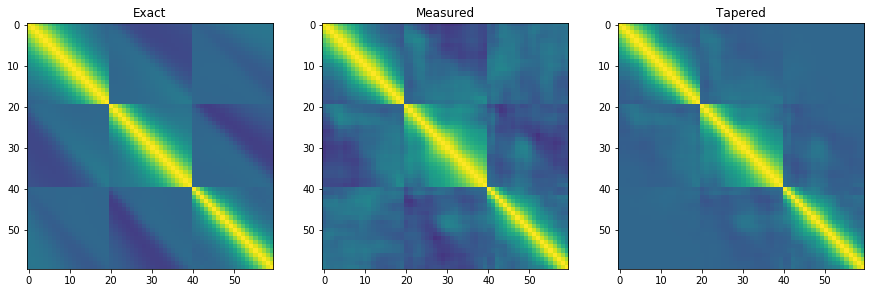

In [10]:
figure, ax = plt.subplots(1, 3, figsize=(15, 5))

vmin, vmax = -0.5, 1

ax[0].set_title("Exact")
ax[0].imshow(covmat.correlation(), vmax=vmax, vmin=vmin)

ax[1].set_title("Measured")
ax[1].imshow(covmat_measured.correlation(), vmax=vmax, vmin=vmin)

ax[2].set_title("Tapered")
ax[2].imshow(covmat_tapered.correlation(), vmax=vmax, vmin=vmin)